In [1]:
import torch
import torch.nn as nn
from spiral_neuralnet import *
import spiral_neuralnet as spiral

In [ ]:
%run spiral_neuralnet.py --interactive --description=dend_temp_contrast_fixed_bias

In [ ]:
dend_temp_contrast_net = net

In [ ]:
delta_w_dend_temp_contrast = net.weights['Out'].data - net.initial_weights['Out'].data
print(delta_w_dend_temp_contrast)

In [ ]:
%run spiral_neuralnet.py --interactive --description=backprop_fixed_bias

In [ ]:
bp_net = net

In [ ]:
delta_w_bp = bp_net.weights['Out'].data - bp_net.initial_weights['Out'].data
print(delta_w_bp)

In [ ]:
bp_net.forward_activity['H1'].shape

In [ ]:
torch.all(delta_w_bp == 0)

In [ ]:
plt.figure()
plt.scatter(delta_w_bp.flatten(), delta_w_dend_temp_contrast.flatten())

In [ ]:
torch.all(delta_w_bp.flatten() == delta_w_dend_temp_contrast.flatten())

In [ ]:
torch.all(dend_temp_contrast_net.forward_activity['Out'] == bp_net.forward_activity['Out'])

In [ ]:
torch.all(dend_temp_contrast_net.initial_weights['Out'].data == bp_net.initial_weights['Out'].data)

In [ ]:
dend_temp_contrast_net.nudges['Out'].shape

In [ ]:
local_loss = dend_temp_contrast_net.nudges['Out'] * dend_temp_contrast_net.ReLU_derivative(dend_temp_contrast_net.forward_soma_state['Out'])

In [ ]:
x = dend_temp_contrast_net.forward_soma_state['Out']
output = torch.ones_like(x)
indexes = torch.where(x <= 0)
output[indexes] = 0
print(output)

In [ ]:
print(local_loss)
print(dend_temp_contrast_net.forward_activity['Out'])
print(dend_temp_contrast_net.forward_soma_state['Out'])
print(dend_temp_contrast_net.nudges['Out'])

In [ ]:
plt.figure()
layer = 'H2'
dw_dend_tc_H1 = dend_temp_contrast_net.weights[layer].data - dend_temp_contrast_net.initial_weights[layer].data
dw_bp_H1 = bp_net.weights[layer].data - bp_net.initial_weights[layer].data
plt.scatter(dw_bp_H1.flatten(), dw_dend_tc_H1.flatten())
torch.all(dw_dend_tc_H1 == dw_bp_H1)

In [ ]:
dw_bp_H1 == dw_dend_tc_H1

In [ ]:
dend_temp_contrast_net.backward_activity['H1']

In [ ]:
torch.tensor(dend_temp_contrast_net.training_losses).dtype

In [ ]:
plt.figure()
unit = 6
dw_dend_tc_H2_0 = dend_temp_contrast_net.weights['H2'].data[unit] - dend_temp_contrast_net.initial_weights['H2'].data[unit]
dw_bp_H2_0 = bp_net.weights['H2'].data[unit] - bp_net.initial_weights['H2'].data[unit]
plt.scatter(dw_bp_H2_0, dw_dend_tc_H2_0)

# model = np.polyfit(dw_bp_H2_0, dw_dend_tc_H2_0, 1)
# slope = model[0]
# intercept = model[1]
# plt.plot(dw_bp_H2_0, slope * dw_bp_H2_0 + intercept, color='red')
# print(slope)

plt.show()

In [ ]:
print(dend_temp_contrast_net.weights['H2'].data[6])
print(dend_temp_contrast_net.initial_weights['H2'].data[6])

In [ ]:
print(bp_net.weights['H2'].data[6])
print(bp_net.initial_weights['H2'].data[6])

In [ ]:
dend_temp_contrast_net.weights['H2'].data[6] == bp_net.weights['H2'].data[6]

In [ ]:
dend_temp_contrast_net.weights['H1'].data

In [ ]:
bp_net.weights['H1'].data

In [ ]:
dend_temp_contrast_net.weights['H1'].data - bp_net.weights['H1'].data

In [ ]:
torch.all(dend_temp_contrast_net.ReLU_derivative(dend_temp_contrast_net.forward_soma_state['H2']) == bp_net.ReLU_derivative(bp_net.forward_soma_state['H2']))

In [ ]:
local_loss_H2 = dend_temp_contrast_net.nudges['H2'] * dend_temp_contrast_net.ReLU_derivative(dend_temp_contrast_net.forward_soma_state['H2'])

In [ ]:
print(local_loss_H2)
print(dend_temp_contrast_net.forward_activity['H2'])
print(dend_temp_contrast_net.forward_soma_state['H2'])
print(dend_temp_contrast_net.nudges['H2'])

In [ ]:
bp_net.weights['H2'].grad.shape

In [ ]:
dend_temp_contrast_net.nudges['H2'].shape

In [ ]:
dend_temp_contrast_net.forward_dend_state['H2']

In [ ]:
plt.figure()
# plt.scatter(dw_bp_H1.flatten(), bp_net.mlp[-4].weight.grad.flatten())

# model = np.polyfit(dw_bp_H2, bp_net.mlp[-4].weight.grad.flatten(), 1)
# slope = model[0]
# intercept = model[1]
# plt.plot(dw_bp_H2, slope * dw_bp_H2 + intercept, color='red')
# print(slope)

plt.show()

In [ ]:
torch.set_printoptions(precision=30)
print(dend_temp_contrast_net.weights['H1'][0][0])
print(dend_temp_contrast_net.forward_activity['H1'][0][0])
print(dend_temp_contrast_net.backward_activity['H1'][0][0])
print(dend_temp_contrast_net.nudges['H1'][0][0])
print(dend_temp_contrast_net.forward_activity['Input'][0][0])

In [ ]:
bp_net.weights['H1'].grad.data[0][0] / bp_net.forward_activity['Input'][0][0]

In [ ]:
dend_temp_contrast_net.nudges['H1'][0][0] # * dend_temp_contrast_net.forward_activity['Input'][0][0]

In [ ]:
dw_bp_H1[0]

In [ ]:
dw_dend_tc_H1[0]

In [ ]:
torch.all(dend_temp_contrast_net.forward_activity['Input'] == bp_net.forward_activity['Input'])

In [ ]:
bp_net.forward_activity['Input'][0][0]

In [ ]:
dw_bp_H1 - dw_dend_tc_H1

In [ ]:
bp_net.hooked_grads['H1']

In [ ]:
dend_temp_contrast_net.nudges['H1']

In [ ]:
bp_net.hooked_grads['H1'] + dend_temp_contrast_net.nudges['H1']

In [ ]:
bp_net.hooked_grads['H2'] + dend_temp_contrast_net.nudges['H2']

In [ ]:
bp_net.hooked_grads['Out'] + dend_temp_contrast_net.nudges['Out']

In [ ]:
plt.figure()
plt.scatter(bp_net.hooked_grads['Out'].detach().numpy().flatten(), -dend_temp_contrast_net.nudges['Out'].detach().numpy().flatten())
plt.show()

In [ ]:
bp_net.hooked_grads['H1'] == -dend_temp_contrast_net.nudges['H1'].type(torch.float32)

In [ ]:
dend_temp_contrast_net.nudges['Out']

In [ ]:
bp_net.forward_activity['Out']

In [ ]:
bp_net.forward_activity['Input']

In [ ]:
scalar = torch.tensor(2.0) / torch.tensor(4.0)
scalar

In [ ]:
print(scalar.item())

In [2]:
%run spiral_neuralnet.py --interactive --description=dend_temp_contrast_learned_bias --debug

  0%|          | 0/2 [00:00<?, ?it/s]

One train step completed.


In [3]:
dtc_net = net

In [4]:
%run spiral_neuralnet.py --interactive --description=backprop_learned_bias --debug

  0%|          | 0/2 [00:00<?, ?it/s]

One train step completed.


In [5]:
bp_net = net

In [39]:
layer = 'H1'
delta_b_bp = bp_net.biases[layer].data - bp_net.initial_biases[layer].data
delta_b_dtc = dtc_net.biases[layer].data - dtc_net.initial_biases[layer].data

0.9372119214544161


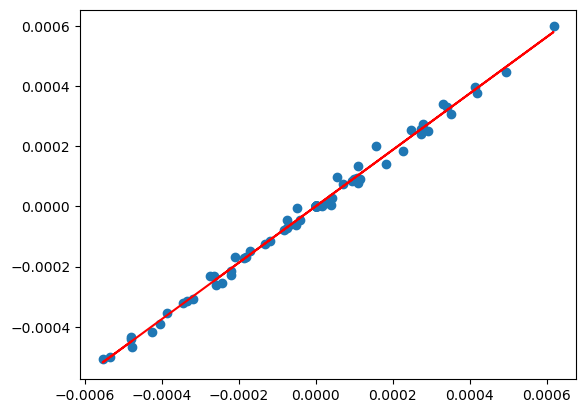

In [40]:
plt.figure()
x = delta_b_bp.detach().numpy()
y = delta_b_dtc.detach().numpy()
plt.scatter(x, y)

model = np.polyfit(x, y, 1)
slope = model[0]
intercept = model[1]
plt.plot(x, slope * x + intercept, color='red')
print(slope)

plt.show()

In [41]:
dtc_net.biases[layer].data - bp_net.biases[layer].data

tensor([ 3.0696e-05,  0.0000e+00, -4.1038e-05,  1.2517e-05, -1.1027e-05,
         0.0000e+00,  3.3915e-05,  0.0000e+00,  3.6925e-05,  0.0000e+00,
         0.0000e+00,  0.0000e+00, -4.4018e-05, -5.6028e-06, -3.0696e-06,
         4.1127e-06,  4.5300e-06,  6.4969e-06, -3.3706e-05, -1.6220e-05,
         2.3384e-05,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -1.3828e-05,
        -3.6180e-05,  0.0000e+00,  2.2113e-05,  0.0000e+00,  0.0000e+00,
        -8.8513e-06,  0.0000e+00,  0.0000e+00,  3.0071e-05,  0.0000e+00,
        -4.3154e-05,  0.0000e+00,  2.3782e-05,  4.3094e-05, -1.6183e-05,
        -1.0908e-05,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  1.7062e-05,  0.0000e+00,  1.3669e-05,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  9.0003e-06,  0.0000e+00,  0.0000e+00,
        -3.7044e-05,  0.0000e+00,  0.0000e+00,  8.2254e-06,  3.1829e-05,
         0.0000e+00,  6.2920e-06, -6.7204e-06,  0.0

Dend EI Testing

  0%|          | 0/1 [00:00<?, ?it/s]

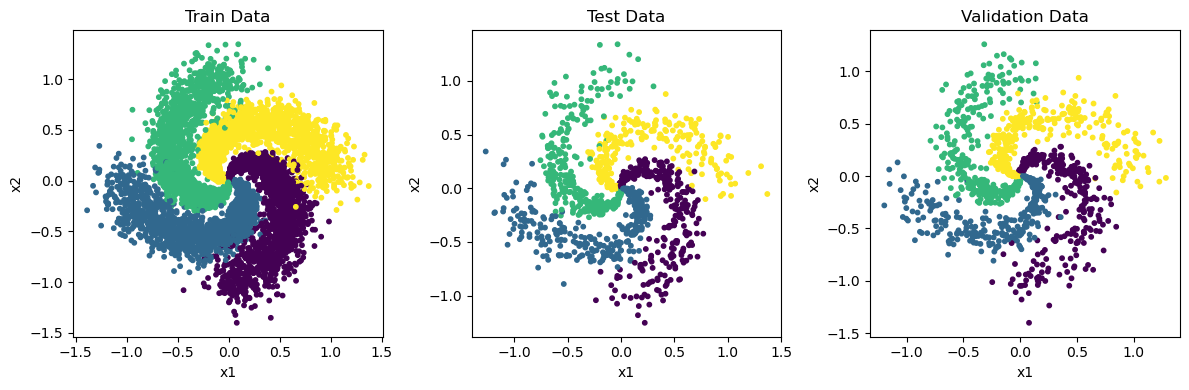

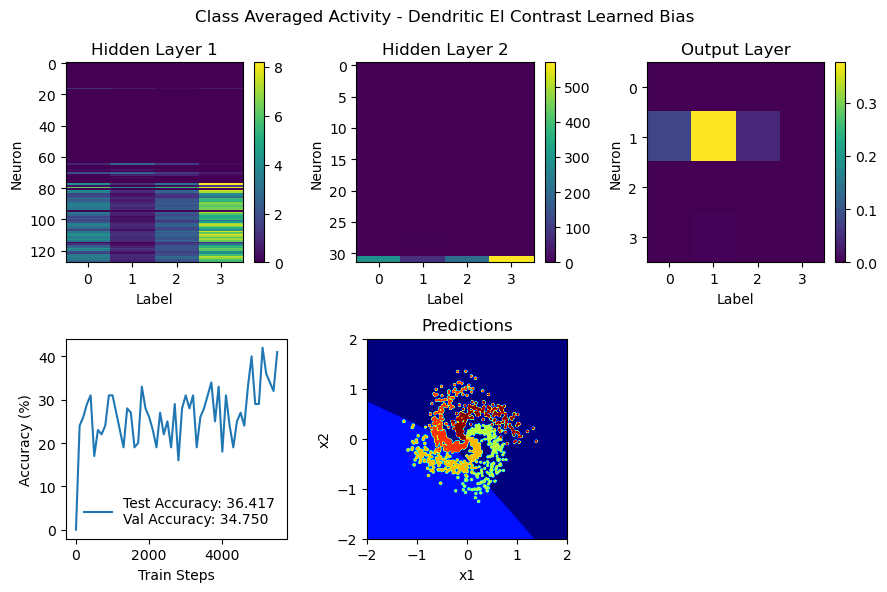

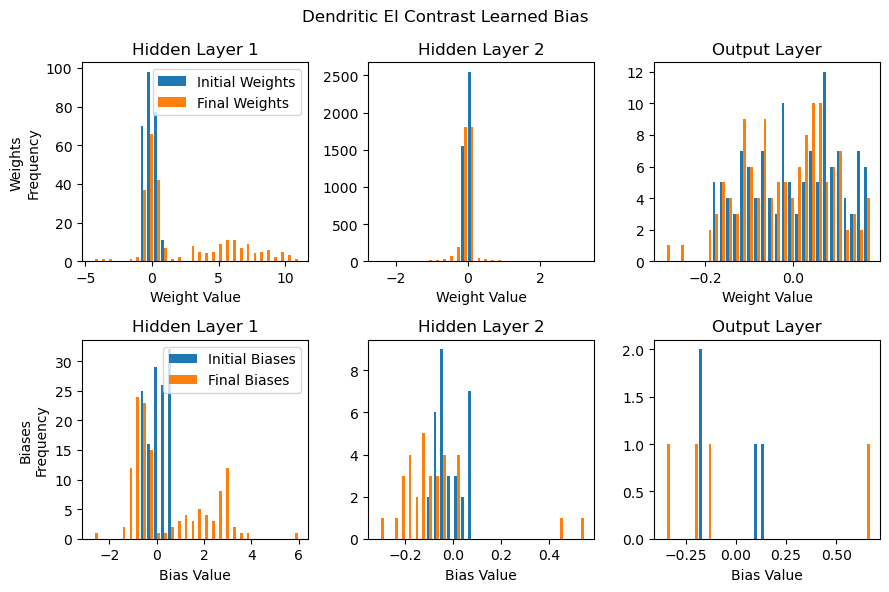

In [55]:
%run spiral_neuralnet.py --description=dend_EI_contrast_learned_bias --show_plot --interactive

In [56]:
dend_EI_net = net

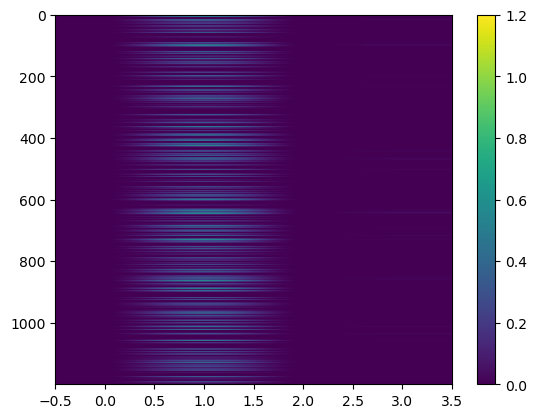

In [57]:
plt.figure()
plt.imshow(dend_EI_net.forward_activity['Out'], aspect='auto', interpolation=None)
plt.colorbar()
plt.show()

In [58]:
dend_EI_net.forward_activity

{'Input': tensor([[ 0.0879,  0.4298],
         [ 0.1598,  0.1242],
         [-0.0140, -0.0012],
         ...,
         [-0.0547,  0.3247],
         [-0.5230,  0.1956],
         [ 0.0776, -0.5849]]),
 'H1': tensor([[0.0000, 8.5404, 1.3840,  ..., 0.0000, 0.0000, 5.9819],
         [0.0000, 5.8412, 0.3056,  ..., 0.0000, 0.0000, 3.9432],
         [0.0000, 3.3298, 0.0000,  ..., 0.0000, 0.0000, 2.0715],
         ...,
         [0.0000, 6.4560, 0.4496,  ..., 0.0000, 0.0000, 4.4283],
         [0.0000, 1.8716, 0.0000,  ..., 0.0000, 0.0000, 1.0273],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]),
 'H2': tensor([[5.9384e+02, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [4.0057e+02, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         [2.2098e+02, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
          0.0000e+00],
         ...,
         [4.4398e+02, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+

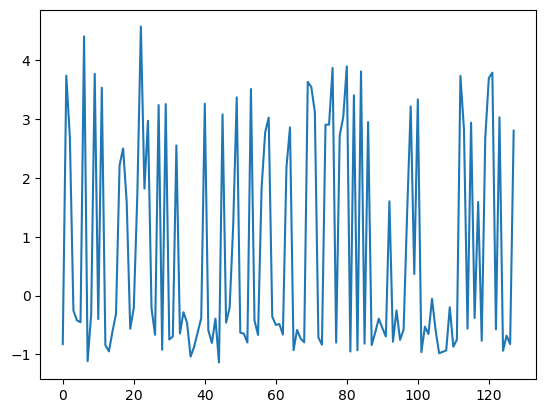

In [73]:
plt.figure()
plt.plot(torch.mean(dend_EI_net.biases_train_history['H1'], axis=0))
plt.show()